In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime
import gzip
import pickle
import time

%matplotlib inline

import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from tslearn.clustering import TimeSeriesKMeans

## Example 0: daily water consumption profiles

(84, 144) (84,)


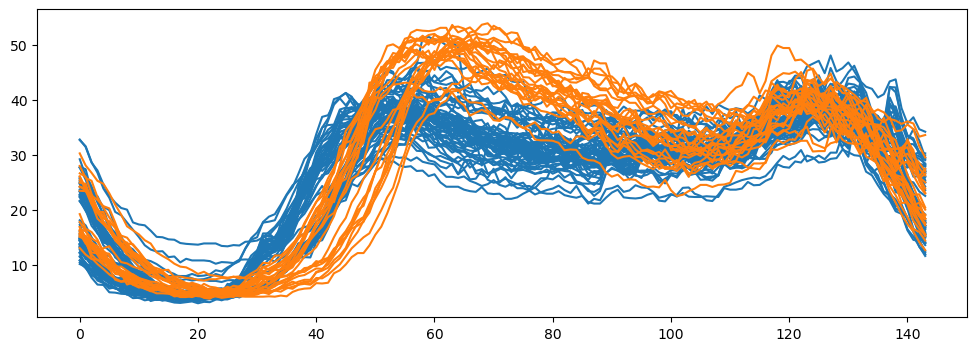

In [3]:
# Dataset 0

df = pd.read_csv('water_consumption_profiles.csv')
df['date'] = df['date'].map(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
df = df.set_index('date')
df_ = df.groupby([df.index.month, df.index.weekday]).mean()
X = df_.values
y = df_.reset_index([1])['date'].map(lambda x: 0 if x < 5 else 1).values
N = len(y)

print(X.shape, y.shape)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X[y == 0, :].T, '#1F77B4')
plt.plot(X[y == 1, :].T, '#FF7F0E')
plt.show()

# plt.figure(figsize=(12, 4))
# # plt.plot(X.T, 'k')
# plt.plot(X[y == 0, :][:1,:].T, '#1F77B4')
# plt.plot(X[y == 1, :][:1,:].T, '#FF7F0E')
# plt.show()

In [4]:
shuffled_indices_ = np.random.permutation(N)
test_indices = shuffled_indices_[int(0.65*N):].copy()
train_indices = shuffled_indices_[:int(0.65*N)].copy()

X_train, y_train = X[train_indices, :], y[train_indices]
X_test, y_test = X[test_indices, :], y[test_indices]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(54, 144) (54,)
(30, 144) (30,)


In [5]:
t = time.time()

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

print(time.time() - t)

0.09141016006469727


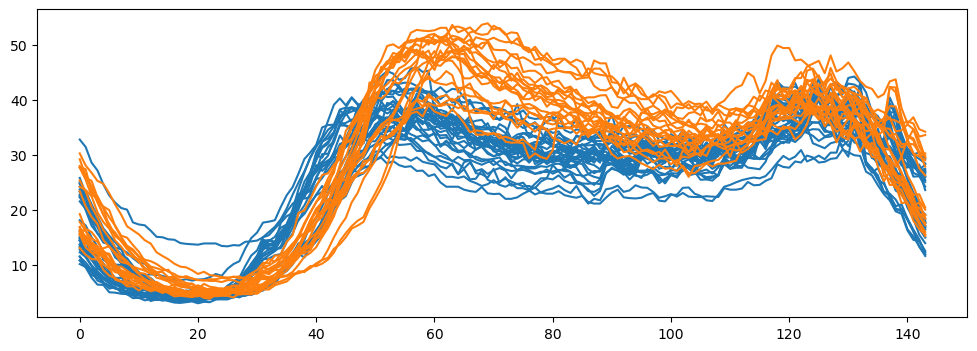

In [6]:
labels = kmeans.predict(X_train)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_train[labels == 0, :].T, '#1F77B4')
plt.plot(X_train[labels == 1, :].T, '#FF7F0E')
plt.show()


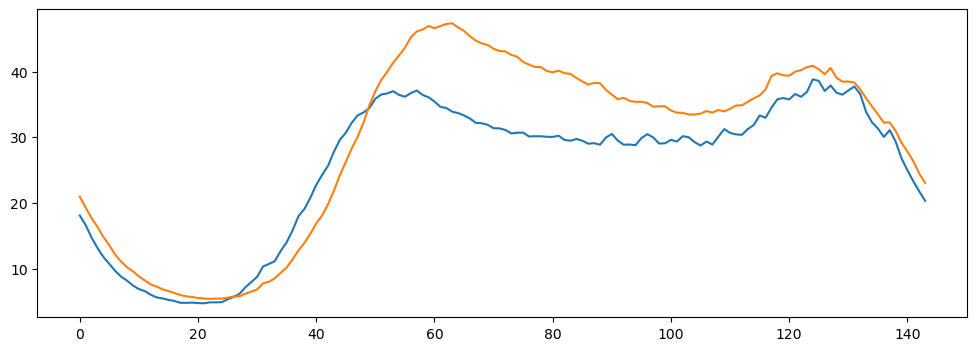

In [7]:
plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(kmeans.cluster_centers_[0, :].T, '#1F77B4')
plt.plot(kmeans.cluster_centers_[1, :].T, '#FF7F0E')
plt.show()

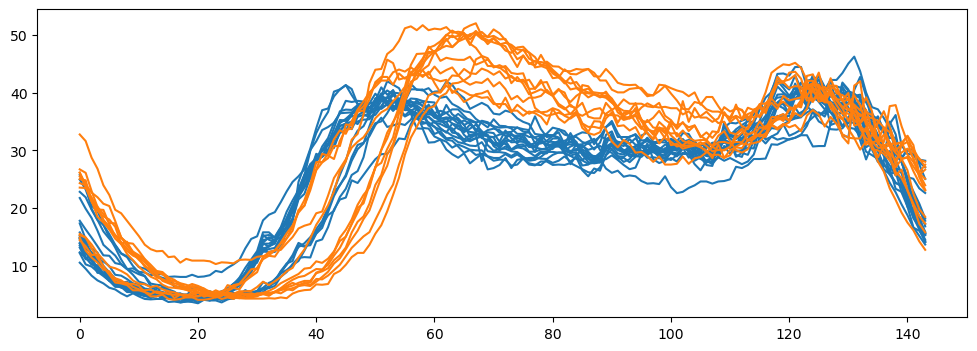

In [8]:
labels = kmeans.predict(X_test)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_test[labels == 0, :].T, '#1F77B4')
plt.plot(X_test[labels == 1, :].T, '#FF7F0E')
plt.show()

In [9]:
# # Dataset 1

# L = 100
# N1 = 100
# N2 = 100
# N = N1 + N2

# T = np.linspace(0, 4*np.pi, L)
# # X1 = np.sin(T + 0.00 * np.random.randn(N1, L)) + 0.15 * np.random.randn(N1, L)
# X1 = np.sin(T + 0.35 * np.random.randn(N1, L)) + 0.15 * np.random.randn(N1, L)
# y1 = 0 * np.ones(N1)
# # X2 = np.cos(T + 0.00 * np.random.randn(N2, L)) + 0.15 * np.random.randn(N2, L)
# X2 = np.cos(T + 0.35 * np.random.randn(N2, L)) + 0.15 * np.random.randn(N2, L)
# y2 = 1 * np.ones(N2)
# X = np.vstack([X1, X2])
# y = np.hstack([y1, y2])

# print(X.shape, y.shape)

# plt.figure(figsize=(12, 4))
# # plt.plot(X.T, 'k')
# plt.plot(X[y == 0, :].T, '#1F77B4')
# plt.plot(X[y == 1, :].T, '#FF7F0E')
# plt.show()

# plt.figure(figsize=(12, 4))
# # plt.plot(X.T, 'k')
# plt.plot(X[y == 0, :][:1,:].T, '#1F77B4')
# plt.plot(X[y == 1, :][:1,:].T, '#FF7F0E')
# plt.show()

In [10]:
# # Dataset 2

# L = 100
# N1 = 100
# N2 = 100
# N = N1 + N2

# T = np.linspace(0, 4*np.pi, L)
# # X1 = np.sin(T + 0.00 * np.random.randn(N1, L)) + 0.15 * np.random.randn(N1, L)
# X1 = np.sin(T + 0.35 * np.random.randn(N1, L)) + 0.15 * np.random.randn(N1, L)
# y1 = 0 * np.ones(N1)
# # X2 = np.cos(T + 0.00 * np.random.randn(N2, L)) + 0.15 * np.random.randn(N2, L)
# # X2 = np.cos(T + 0.35 * np.random.randn(N2, L)) + 0.15 * np.random.randn(N2, L)
# X2 = np.sin(T + 0.35 * np.random.randn(N2, L)) + 0.15 * np.random.randn(N2, L)
# X2 = np.clip(1.75 * X2, -1.0, 1.0)
# y2 = 1 * np.ones(N2)
# X = np.vstack([X1, X2])
# y = np.hstack([y1, y2])

# print(X.shape, y.shape)

# plt.figure(figsize=(12, 4))
# # plt.plot(X.T, 'k')
# plt.plot(X[y == 0, :].T, '#1F77B4')
# plt.plot(X[y == 1, :].T, '#FF7F0E')
# plt.show()

# plt.figure(figsize=(12, 4))
# # plt.plot(X.T, 'k')
# plt.plot(X[y == 0, :][:1,:].T, '#1F77B4')
# plt.plot(X[y == 1, :][:1,:].T, '#FF7F0E')
# plt.show()

In [11]:
# # Dataset 3

# L = 100
# N1a = 100
# N1b = 100
# N1 = N1a + N1b
# N2a = 100
# N2b = 100
# N2 = N2a + N2b
# N = N1 + N2

# T = np.linspace(0, 4*np.pi, L)

# X1a = np.sin(T + 0.00 * np.random.randn(N1a, L)) + 0.15 * np.random.randn(N1a, L)
# # X1a = np.sin(T + 0.35 * np.random.randn(N1a, L)) + 0.15 * np.random.randn(N1a, L)
# y1a = 0 * np.ones(N1a)
# X2a = np.cos(T + 0.00 * np.random.randn(N2a, L)) + 0.15 * np.random.randn(N2a, L)
# # X2a = np.cos(T + 0.35 * np.random.randn(N2a, L)) + 0.15 * np.random.randn(N2a, L)
# # X2a = np.sin(T + 0.35 * np.random.randn(N2a, L)) + 0.15 * np.random.randn(N2a, L)
# X2a = np.clip(1.75 * X2a, -1.0, 1.0)
# y2a = 1 * np.ones(N2a)

# X1b = np.cos(T + 0.00 * np.random.randn(N1b, L)) + 0.15 * np.random.randn(N1b, L)
# # X1b = np.cos(T + 0.35 * np.random.randn(N1b, L)) + 0.15 * np.random.randn(N1b, L)
# y1b = 0 * np.ones(N1b)
# X2b = np.sin(T + 0.00 * np.random.randn(N2b, L)) + 0.15 * np.random.randn(N2b, L)
# # X2a = np.sin(T + 0.35 * np.random.randn(N2b, L)) + 0.15 * np.random.randn(N2b, L)
# # X2a = np.cos(T + 0.35 * np.random.randn(N2b, L)) + 0.15 * np.random.randn(N2b, L)
# X2b = np.clip(1.75 * X2b, -1.0, 1.0)
# y2b = 1 * np.ones(N2b)

# X = np.vstack([X1a, X2a, X1b, X2b])
# y = np.hstack([y1a, y2a, y1b, y2b])

# print(X.shape, y.shape)

# plt.figure(figsize=(12, 4))
# # plt.plot(X.T, 'k')
# plt.plot(X[y == 0, :].T, '#1F77B4')
# plt.plot(X[y == 1, :].T, '#FF7F0E')
# plt.show()

# plt.figure(figsize=(12, 4))
# # plt.plot(X.T, 'k')
# plt.plot(X[y == 0, :][:1,:].T, '#1F77B4')
# plt.plot(X[y == 1, :][:1,:].T, '#FF7F0E')
# plt.show()

(200, 100) (200,)


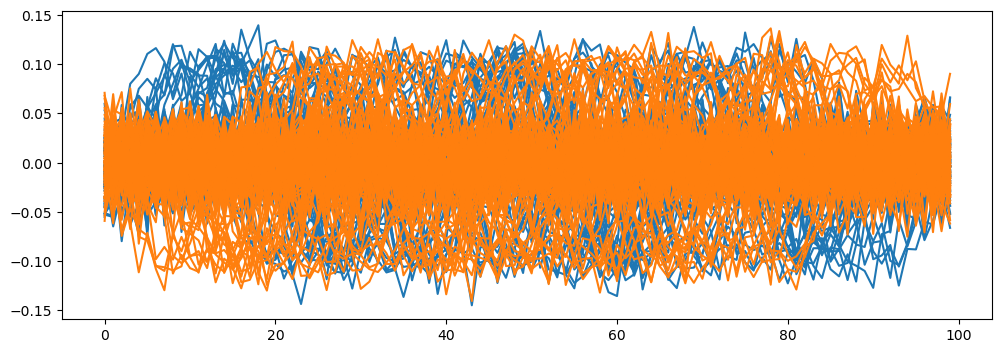

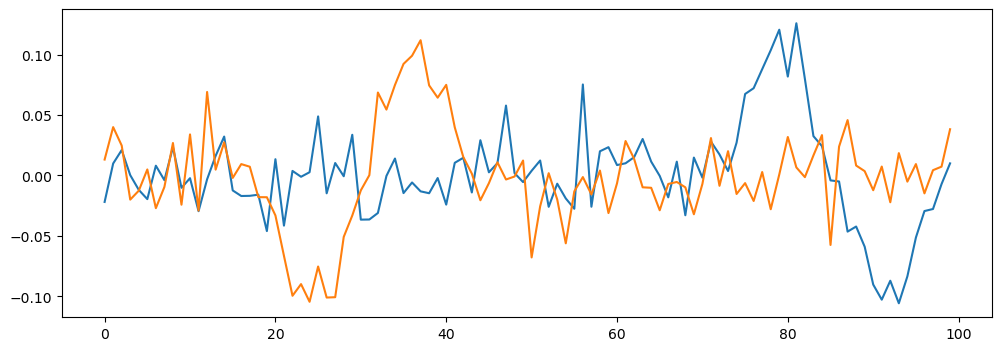

In [12]:
# Dataset 4

L = 100
N1 = 100
N2 = 100
N = N1 + N2

T = np.linspace(0, 4*np.pi, L)

X1 = 0.1 * (np.sin(2*T + 0.00 * np.random.randn(N1, L)) + 0.15 * np.random.randn(N1, L))
# X1 = 0.1 * (np.sin(2*T + 0.35 * np.random.randn(N1, L)) + 0.15 * np.random.randn(N1, L))
# X1[:, int(0.25*L):] = np.zeros((N1, L - int(0.25*L)))
X1[:, int(0.25*L):] = 0.025 * np.random.randn(N1, L - int(0.25*L))
# X1 = np.roll(X1, shift=int(0.25*L), axis=1)
for i in range(N1):
    X1[i, :] = np.roll(X1[i, :], shift=np.random.randint(int(0.75*L)), axis=0)
y1 = 0 * np.ones(N1)

X2 = 0.1 * (np.sin(2*T + np.pi + 0.00 * np.random.randn(N2, L)) + 0.15 * np.random.randn(N2, L))
# X2 = 0.1 * (np.sin(2*T + np.pi + 0.35 * np.random.randn(N2, L)) + 0.15 * np.random.randn(N2, L))
# X2[:, int(0.25*L):] = np.zeros((N2, L - int(0.25*L)))
X2[:, int(0.25*L):] = 0.025 * np.random.randn(N2, L - int(0.25*L))
# X2 = np.roll(X2, shift=int(0.25*L), axis=1)
for i in range(N2):
    X2[i, :] = np.roll(X2[i, :], shift=np.random.randint(int(0.75*L)), axis=0)
y2 = 1 * np.ones(N2)

X = np.vstack([X1, X2])
y = np.hstack([y1, y2])

print(X.shape, y.shape)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X[y == 0, :].T, '#1F77B4')
plt.plot(X[y == 1, :].T, '#FF7F0E')
plt.show()

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X[y == 0, :][:1,:].T, '#1F77B4')
plt.plot(X[y == 1, :][:1,:].T, '#FF7F0E')
plt.show()

In [13]:
shuffled_indices_ = np.random.permutation(N)
test_indices = shuffled_indices_[int(0.65*N):].copy()
train_indices = shuffled_indices_[:int(0.65*N)].copy()

X_train, y_train = X[train_indices, :], y[train_indices]
X_test, y_test = X[test_indices, :], y[test_indices]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(130, 100) (130,)
(70, 100) (70,)


## clustering with regular k-means


In [14]:

t = time.time()

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
print(time.time() - t)

0.05562114715576172


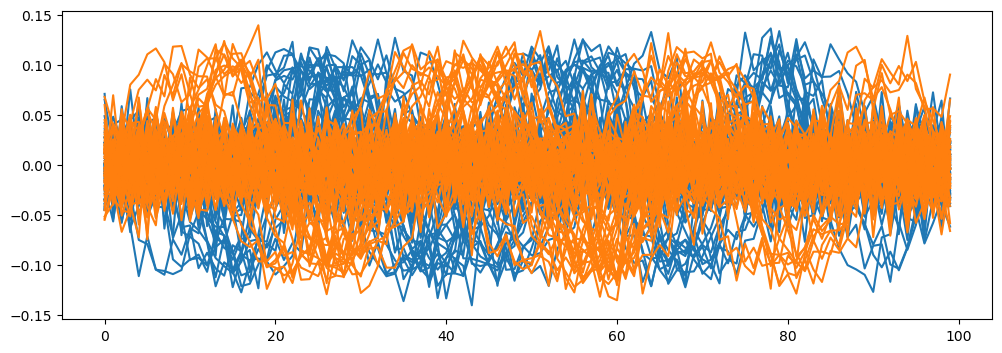

In [15]:
labels = kmeans.predict(X_train)
# labels = dba_km.predict(X_train)
plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_train[labels == 0, :].T, '#1F77B4')
plt.plot(X_train[labels == 1, :].T, '#FF7F0E')
plt.show()

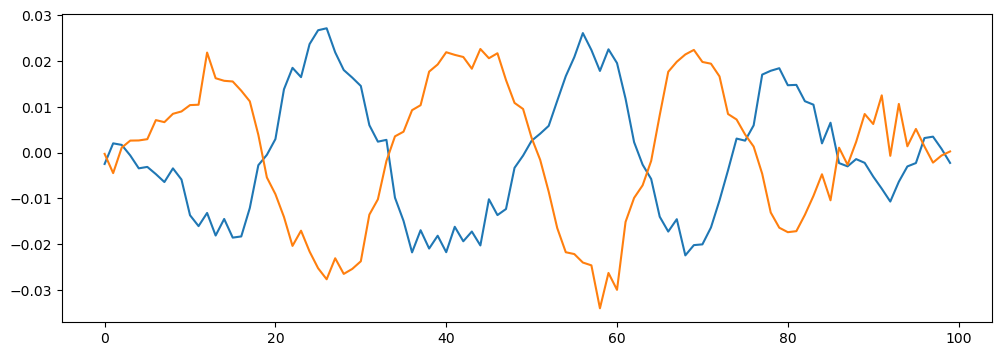

In [16]:

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(kmeans.cluster_centers_[0, :].T, '#1F77B4')
plt.plot(kmeans.cluster_centers_[1, :].T, '#FF7F0E')
# plt.plot(dba_km.cluster_centers_[0, :].T, '#1F77B4')
# plt.plot(dba_km.cluster_centers_[1, :].T, '#FF7F0E')
plt.show()

In [17]:
confusion_matrix(y_train, labels)

array([[22, 40],
       [43, 25]])

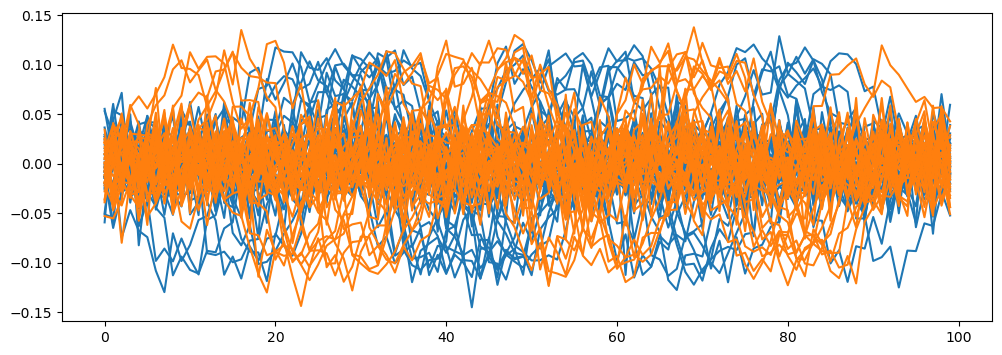

In [18]:
labels = kmeans.predict(X_test)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_test[labels == 0, :].T, '#1F77B4')
plt.plot(X_test[labels == 1, :].T, '#FF7F0E')
plt.show()

In [19]:
confusion_matrix(y_test, labels)


array([[13, 25],
       [22, 10]])

### TimeSeriesKMeans

In [20]:
t = time.time()

# tskmeans = TimeSeriesKMeans(n_clusters=2, metric='euclidean', n_init=5)
tskmeans = TimeSeriesKMeans(n_clusters=2, metric='dtw', max_iter_barycenter=100, n_init=5)
# tskmeans = TimeSeriesKMeans(n_clusters=2, metric='softdtw', metric_params={"gamma": .01}, n_init=5)
tskmeans.fit(X_train)

print(time.time() - t)

11.13092303276062


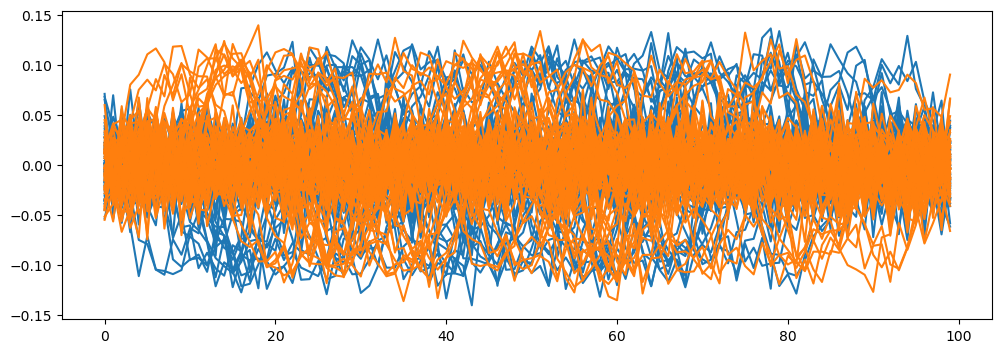

In [21]:
labels = tskmeans.predict(X_train)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_train[labels == 0, :].T, '#1F77B4')
plt.plot(X_train[labels == 1, :].T, '#FF7F0E')
plt.show()

In [22]:
confusion_matrix(y_train, labels)


array([[ 0, 62],
       [67,  1]])

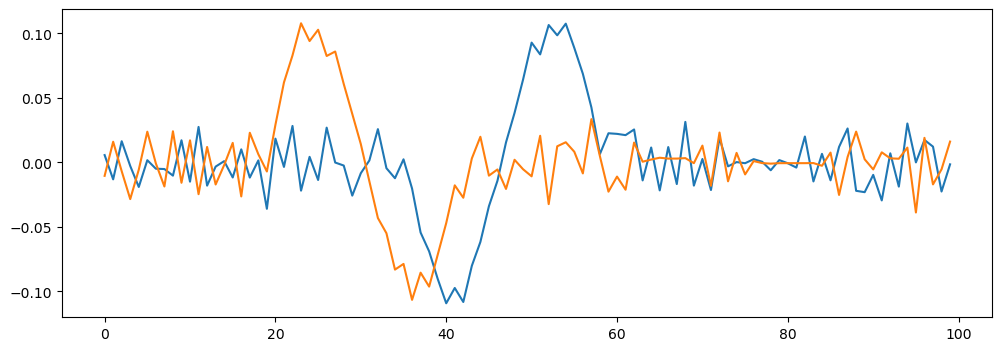

In [23]:
plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(tskmeans.cluster_centers_[0, :, 0].T, '#1F77B4')
plt.plot(tskmeans.cluster_centers_[1, :, 0].T, '#FF7F0E')
plt.show()

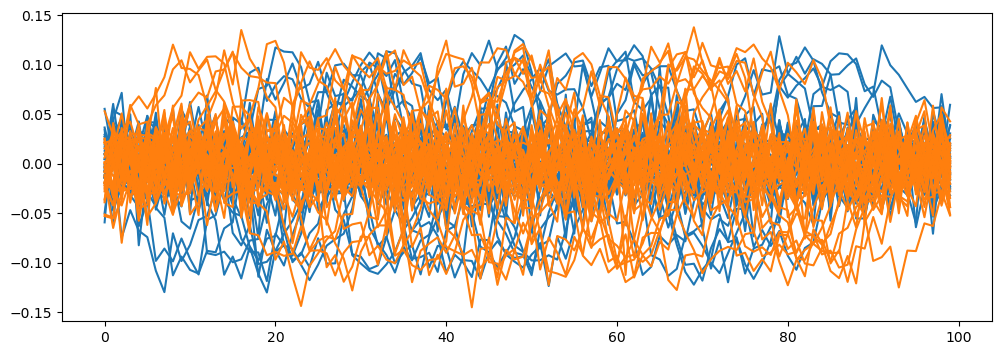

In [24]:
labels = tskmeans.predict(X_test)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_test[labels == 0, :].T, '#1F77B4')
plt.plot(X_test[labels == 1, :].T, '#FF7F0E')
plt.show()

In [25]:
confusion_matrix(y_test, labels)

array([[ 0, 38],
       [32,  0]])

# =================================================

## clustering of daily water consumption 651

### regular k-means

### DBA-k-means
